In [60]:
# clear all variables
for i in list(globals().keys()):
    if(i[0] != '_'):
        exec('del {}'.format(i))

#suppress future warnings -- not really a good idea 
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
        
# suppress future warnings -- not really a good idea 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# ignore all warnings
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import csv
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf') # uses vector figures in pdf exports
plt.style.use('seaborn-pastel')


# create a folder
def create_folder(folder):
    import os     
    try: 
        os.mkdir(folder) 
    except FileExistsError:
        print("Directory [ %s ] already exists"%folder)

#create folder to store results
create_folder('Figures')


def ageCat(row):
    if row["age"] < 75:
        return "-75"
    elif row["age"] > 74 and row["age"] < 80:
        return "75-79"
    elif row["age"] > 79 and row["age"] < 85:
        return "80-84"
    elif row["age"] > 84 and row["age"] < 90:
        return "85-89"
    elif row["age"] > 89 and row["age"] < 95:
        return "90-94"
    elif row["age"] > 94 and row["age"] < 100:
        return "95-99"
    elif row["age"] > 99:
        return "+100"

    
def brainwgt_Cat(row):
    if row["brain weight"] >= 0 and row["brain weight"] < 270:
        return "0-259"
    elif row["brain weight"] > 259 and row["brain weight"] < 540:
        return "270-539"
    elif row["brain weight"] > 539 and row["brain weight"] < 810:
        return "540-809"
    elif row["brain weight"] > 809 and row["brain weight"] < 1080:
        return "810-1079"
    elif row["brain weight"] > 1079 and row["brain weight"] < 1350:
        return "1080-1349"
    elif row["brain weight"] > 1349 and row["brain weight"] < 1621:
        return "1350-1620"
    
def CAATotalSev_Cat(row):
    if row["CAATotalSev"] >= 0 and row["CAATotalSev"] < 5:
        return "0-4"
    elif row["CAATotalSev"] > 4 and row["CAATotalSev"] < 10:
        return "5-9"
    elif row["CAATotalSev"] > 9 and row["CAATotalSev"] < 15:
        return "10-14"
    elif row["CAATotalSev"] > 14 and row["CAATotalSev"] < 20:
        return "15-19"
    elif row["CAATotalSev"] > 19 and row["CAATotalSev"] < 25:
        return "20-24" 

def CAAAreas_Cat(row):
    if row["CAAParenc"] < 1:
        return "0"
    elif row["CAAParenc"] > 0 and row["CAAParenc"] < 3:
        return "1-2"
    elif row["CAAParenc"] > 2 and row["CAAParenc"] < 5:
        return "3-4"
    elif row["CAAParenc"] > 4 and row["CAAParenc"] < 7:
        return "5-6"
    elif row["CAAParenc"] > 6 and row["CAAParenc"] < 9:
        return "7-8"
    elif row["CAAParenc"] > 8 and row["CAAParenc"] < 11:
        return "9-10" 
    
def CAAParenc_Cat(row):
    if row["CAAParenc"] < 1:
        return "0"
    elif row["CAAParenc"] > 0 and row["CAAParenc"] < 3:
        return "1-2"
    elif row["CAAParenc"] > 2 and row["CAAParenc"] < 5:
        return "3-4"
    elif row["CAAParenc"] > 4 and row["CAAParenc"] < 7:
        return "5-6"
    elif row["CAAParenc"] > 6 and row["CAAParenc"] < 9:
        return "7-8"
    elif row["CAAParenc"] > 8 and row["CAAParenc"] < 11:
        return "9-10" 
    elif row["CAAParenc"] > 10 and row["CAAParenc"] < 13:
        return "11-12" 

    
def CAAMeningeal_Cat(row):
    if row["CAAMeningeal"] < 1:
        return "0"
    elif row["CAAMeningeal"] > 0 and row["CAAMeningeal"] < 3:
        return "1-2"
    elif row["CAAMeningeal"] > 2 and row["CAAMeningeal"] < 5:
        return "3-4"
    elif row["CAAMeningeal"] > 4 and row["CAAMeningeal"] < 7:
        return "5-6"
    elif row["CAAMeningeal"] > 6 and row["CAAMeningeal"] < 9:
        return "7-8"
    elif row["CAAMeningeal"] > 8 and row["CAAMeningeal"] < 11:
        return "9-10" 
    elif row["CAAMeningeal"] > 10 and row["CAAMeningeal"] < 13:
        return "11-12" 
    
def frequencyChart(df,cat1,cat2):
    bar = df[[cat1,cat2]]
    bar = bar.groupby([cat1,cat2]).size().reset_index(name='Size')
    
    dement = bar.loc[bar[cat2] == 'Dementia']
    notDement = bar.loc[bar[cat2] == 'No dementia']
    dement  = dement.drop([cat2],axis=1)
    notDement  = notDement.drop([cat2],axis=1)
    dement.columns = [cat1,'Dementia']
    notDement.columns = [cat1,'noDementia']
    dement.reset_index(inplace = True)
    notDement.reset_index(inplace = True)
    
    
    # set up frequency chart for dementia cases with thal stage
    bar = pd.merge(dement, notDement, on=cat1, how='outer')
    bar = bar.sort_values(cat1)
    #bar = bar.fillna(0)
#     bar = bar.dropna() #previously (0) but I think this was a bug

    
    bar.drop(labels = ["index_x","index_y"],axis = 1,inplace = True)
    bar.reset_index(inplace = True)
    bar.drop(labels = ["index"],axis = 1,inplace = True)

#     print(bar)

    return bar


Directory [ Figures ] already exists


#### Extracting data from files loaded for two centers (Cambridge and New Castle) using both Neuropathology and Clinical datasets

In [61]:
# load clinical and pathological dataframes with datasets
clin = pd.read_csv('../data/CFAS_ClinicalData.csv',header = 0) # read clinical dataset
patho = pd.read_excel('../data/CFAS_NeuropathologyData May 2018.xlsx', header = 21) # load pathological dataset
patho.dropna(subset=['Case'], inplace=True) # drop missing values
clin.rename(columns={'labno':'Case'}, inplace=True) # renaming a feature

# Create Seperate dataframes by centre

# Cambridge
# Clinical dataset
clinCambridge = clin['Case'].str.startswith('RH')
clinCambridge = clin[clinCambridge].copy()

# Pathological dataset
pathoCambridge = patho['Case'].str.startswith('RH')
pathoCambridge = patho[pathoCambridge].copy()

short = pd.to_numeric(clinCambridge.loc[:,'Case'].str[2:])
clinCambridge.loc[:,'Case'] = short
clinCambridge.sort_values(by=['Case'], inplace = True)
clinCambridge.head()

short = pathoCambridge.loc[:,'Case'].str[2:]
pathoCambridge.loc[:,'Case'] = pd.to_numeric(short)
pathoCambridge.sort_values(by=['Case'],inplace =True)

cambridge = pathoCambridge.merge(clinCambridge, how = 'left', on = ['Case'])
cambridge.head()

# Newcastle
clinNewcastle = clin['Case'].str.startswith('NA')
clinNewcastle = clin[clinNewcastle].copy()

pathoNewcastle = patho['Case'].str.startswith('NA')
pathoNewcastle = patho[pathoNewcastle].copy()

short = pd.to_numeric(clinNewcastle.loc[:,'Case'].str[2:].str.replace("/",""))
clinNewcastle.loc[:,'Case'] = short
clinNewcastle.sort_values(by=['Case'], inplace = True)

short = pathoNewcastle.loc[:,'Case'].str[2:].str.replace("/","")
pathoNewcastle.loc[:,'Case'] = pd.to_numeric(short)
pathoNewcastle.sort_values(by=['Case'],inplace =True)

newcastle = pathoNewcastle.merge(clinNewcastle, how = 'left', on = ['Case'])
# newcastle.head()

# Creates master data set containing both cambridge and newcastle data sets
master = cambridge.append(newcastle).copy()
master = master[(master[['dem_nver4']] != 0).all(axis=1)]
master.to_csv(r'../data/master.csv',mode = 'w',index=False)

patho.to_csv(r'../data/patho.csv',mode = 'w',index=False)

# count controls and dementia
# count cluster memberships
dementias=master.dem_nver4.value_counts()
print('No dementia : {} \nDementia    : {}'.format(dementias[0], dementias[1]))
print('Samples     : {} \nFeatures    : {}'.format(master.shape[0], master.shape[1]))

No dementia : 107 
Dementia    : 70
Samples     : 186 
Features    : 510


In [62]:
# extract neuropathology dataset
patho_features = pd.read_csv('../data/Neuropathology Features.csv',header = 0).Features
master = pd.read_csv('../data/master.csv',header = 0)
master.rename(columns={'aged':'age', 'brainwgt':'brain weight'}, inplace=True)

patho_data = master[patho_features].copy()
patho_data['dem_nver4'] = master['dem_nver4'].copy()
patho_data.columns

Index(['BraakStage', 'BrainNetStage', 'age', 'CAATotalSev', 'CAAMeningeal',
       'brain weight', 'CAAType', 'ThalStage', 'MTSPETSA', 'CAAAreas',
       'SubpialBrainstem', 'CAAParenc', 'TSATotal', 'TSAAny', 'CAAParietal',
       'CAAHippocampus', 'CAAFrontal', 'CAAOccipital', 'BSSPETSA',
       'CAACerebellum', 'AbStageTypical', 'HippocTauStage', 'SubcorticalStage',
       'CorticalStage', 'SubpialMesTemp', 'PARTall', 'MicroinfarctStage',
       'ArgyrGrains', 'OccipMicroing', 'ParMicrin', 'PARTdefinite',
       'FrontalMicroin', 'TempMicroinf', 'CxSPETSA', 'CAATemp', 'TuftedAst',
       'dem_nver4'],
      dtype='object')

In [63]:
# group features values within some different ranges by calling function defined above
patho_data["age"] = patho_data.apply(ageCat,axis=1)
patho_data["brain weight"] = patho_data.apply(brainwgt_Cat,axis=1)
patho_data["CAAAreas"] = patho_data.apply(CAAAreas_Cat,axis=1)
patho_data["CAATotalSev"] = patho_data.apply(CAATotalSev_Cat,axis=1)
patho_data["CAAParenc"] = patho_data.apply(CAAParenc_Cat,axis=1)
patho_data["CAAMeningeal"] = patho_data.apply(CAAMeningeal_Cat,axis=1)


In [64]:
from natsort import natsorted
df = patho_data.age.value_counts().sort_index().reset_index()
adf = df['index'].values
if adf.dtype != 'float64':
    adf = natsorted(adf)
    print(adf)
else:
    print('good')

['-75', '75-79', '80-84', '85-89', '90-94', '95-99', '+100']


In [65]:
patho_feature_order = pd.DataFrame()
patho_feature_order['Features'] = ('Braak stage',
                        'BrainNet tau stage',
                        'age',
                        'CAA type',
                        'CAA meningeal',
                        'brain weight',
                        'Thal phase',
                        'CAA parenchymal',
                        'CAA total severity',
                        'MTSPETSA',
                        'subpial brainstem',
                        'CAA areas',
                        'TSA-any',
                        'CAA parietal',
                        'CAA hippocampus',
                        'CAA occipital',
                        'Subpial mesial temporal',
                        'CAA temporal',
                        'CAA frontal',
                        'BSSPETSA',
                        'CAA cerebellum',
                        'Aβ stage typical',
                        'hippocampal lace tau stage',
                        'Temporal microinfarct',
                        'frontal microinfarct',
                        'TSA-total',
                        'subcortical stage',
                        'PART-all',
                        'cortical stage',
                        'PART-definite',
                        'Occipital microinfarct',
                        'microinfarct stage',
                        'CxSPETSA',
                        'Argyrophilic grains',
                        'parietal microinfarct',
                        'Tufted astrocytes',
                        'dem_nver4')
# add the class label
patho_features = patho_feature_order.iloc[:-1,:]

In [66]:

patho_data.rename(columns={'BraakStage':'Braak stage',
                       'BrainNetStage':'BrainNet tau stage',
#                        'aged':'age',
                       'CAATotalSev':'CAA total severity',
                       'CAAMeningeal':'CAA meningeal',
#                        'brainwgt':'brain weight',
                       'CAAType':'CAA type',
                       'ThalStage':'Thal phase',
                       'CAAAreas':'CAA areas',
                       'SubpialBrainstem':'subpial brainstem',
                       'CAAParenc':'CAA parenchymal',
                       'TSATotal':'TSA-total',
                       'TSAAny':'TSA-any',
                       'CAAParietal':'CAA parietal',
                       'CAAHippocampus':'CAA hippocampus',
                       'CAAFrontal':'CAA frontal',
                       'CAAOccipital':'CAA occipital',
                       'CAACerebellum':'CAA cerebellum',
                       'AbStageTypical':'Aβ stage typical',
                       'HippocTauStage':'hippocampal lace tau stage',
                       'SubcorticalStage':'subcortical stage',
                       'CorticalStage':'cortical stage',
                       'SubpialMesTemp':'Subpial mesial temporal',
                       'PARTall':'PART-all',
                       'MicroinfarctStage':'microinfarct stage',
                       'ArgyrGrains':'Argyrophilic grains',
                       'OccipMicroing':'Occipital microinfarct',
                       'ParMicrin':'parietal microinfarct',
                       'PARTdefinite':'PART-definite',
                       'FrontalMicroin':'frontal microinfarct',
                       'TempMicroinf':'Temporal microinfarct',
                       'CAATemp':'CAA temporal',
                       'TuftedAst':'Tufted astrocytes'} , errors="raise", inplace=True)

patho_features = patho_data.columns
patho_data = patho_data[patho_feature_order.Features]

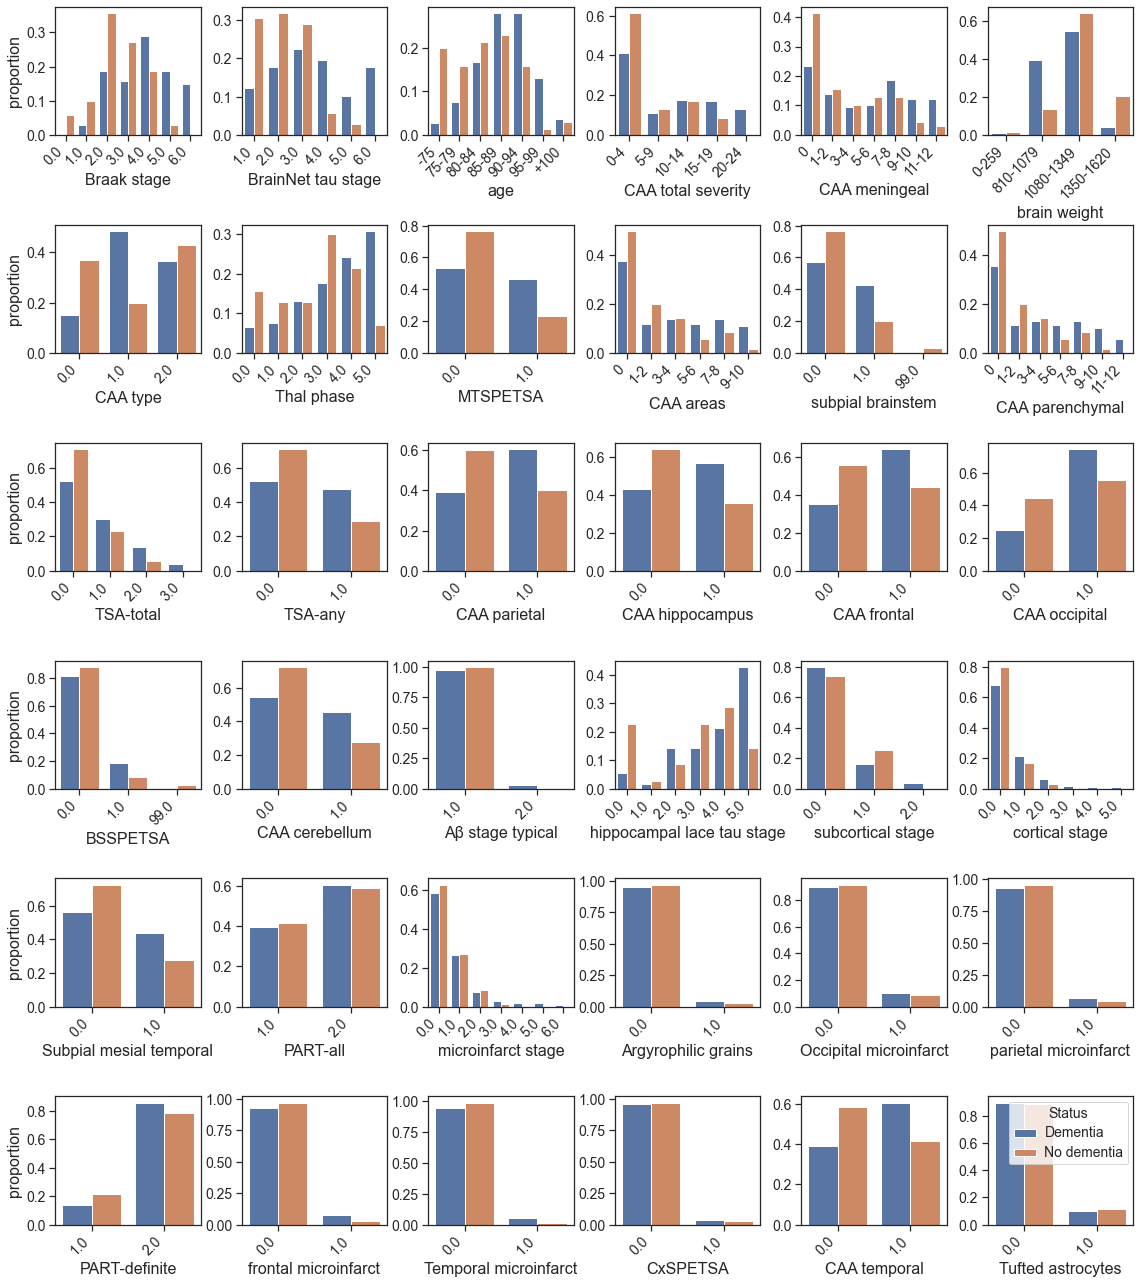

In [67]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted

sns.set_theme(style="ticks", color_codes=True)

fig, axes =plt.subplots(6,6, figsize=(16,18), sharey=False)
axes = axes.flatten()

for ax, col in zip(axes, patho_features):
    x, y, hue = col, "proportion", "dem_nver4"
    hue_order = ["No dementia", "Dementia"]
    order = pd.DataFrame(patho_data[x].value_counts().sort_index().reset_index())
    order= order['index'].values
    
    if order.dtype != 'float64':
        order = natsorted(order)
        
    g = (patho_data[x]
     .groupby(patho_data[hue])
     .value_counts(normalize=True)#.sort_index()
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=order, ax=ax))

    g.legend([],[], frameon=False)
    plt.setp(ax.get_xticklabels(), rotation=45, size='14', horizontalalignment="right")
    plt.setp(ax.get_yticklabels(), size='14')
    ax.xaxis.get_label().set_fontsize(16) 
    ax.yaxis.get_label().set_fontsize(16)
    for ax in axes:
        ax.set_ylabel('')
axes[0].set_ylabel('proportion', size='16')
axes[6].set_ylabel('proportion', size='16')
axes[12].set_ylabel('proportion', size='16')
axes[18].set_ylabel('proportion', size='16')
axes[24].set_ylabel('proportion', size='16')
axes[30].set_ylabel('proportion', size='16')

plt.legend(loc='best');
l = plt.legend()
l.set_title('Status')
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title
plt.tight_layout()
plt.subplots_adjust(wspace=0.28, hspace=.7)

fig.savefig('Figures/Neuropathology_Distrbution.png',dpi=300, bbox_inches="tight")
fig.savefig('Figures/Neuropathology_Distrbution.pdf',dpi=300, bbox_inches="tight")

plt.show()

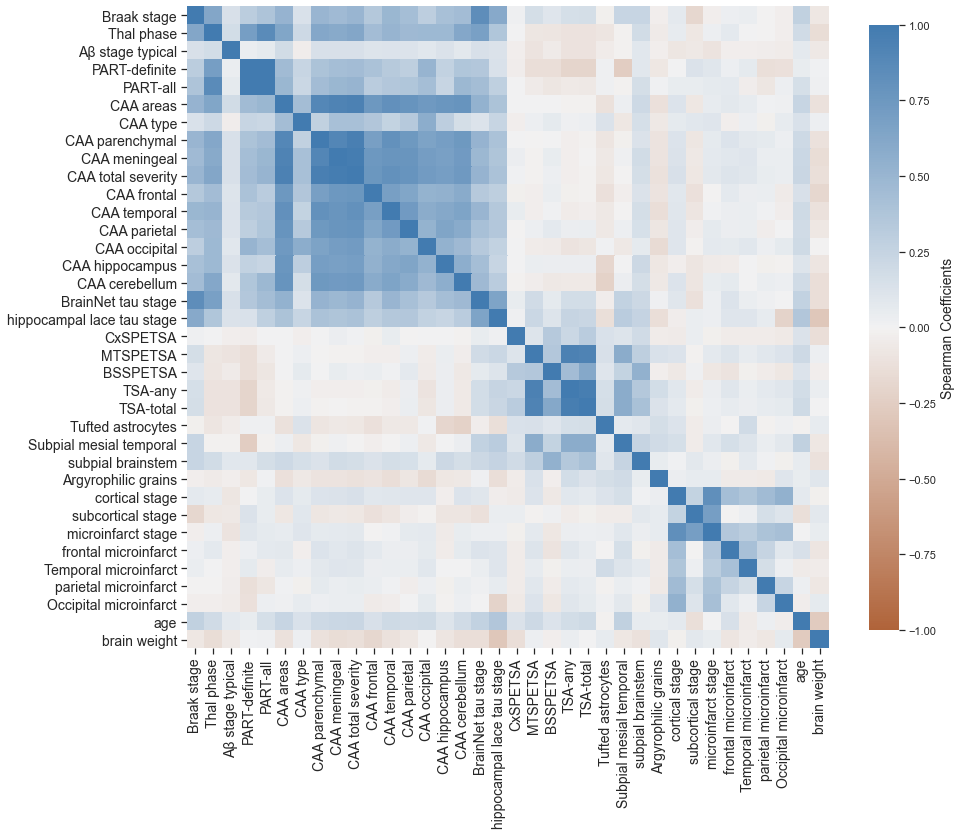

In [68]:
# load clinical and pathological dataframes with datasets
features = pd.read_csv('../data/neuropathology_features.csv',header = 0).features
feats= pd.DataFrame(features)
feats.replace({'features':{'aged':'age', 'brainwgt':'brain weight'}}, inplace=True)
feats = feats.squeeze()
patho = master[feats]
patho['age']=master.age
#For Preprocess and Analysis of Selected Features
patho_selected_features = patho.copy() 
patho_with_AB = patho_selected_features
patho.rename(columns={'BraakStage':'Braak stage',
                       'BrainNetStage':'BrainNet tau stage',
                       'CAATotalSev':'CAA total severity',
                       'CAAMeningeal':'CAA meningeal',
                       'CAAType':'CAA type',
                       'ThalStage':'Thal phase',
                       'CAAAreas':'CAA areas',
                       'SubpialBrainstem':'subpial brainstem',
                       'CAAParenc':'CAA parenchymal',
                       'TSATotal':'TSA-total',
                       'TSAAny':'TSA-any',
                       'CAAParietal':'CAA parietal',
                       'CAAHippocampus':'CAA hippocampus',
                       'CAAFrontal':'CAA frontal',
                       'CAAOccipital':'CAA occipital',
                       'CAACerebellum':'CAA cerebellum',
                       'AbStageTypical':'Aβ stage typical',
                       'HippocTauStage':'hippocampal lace tau stage',
                       'SubcorticalStage':'subcortical stage',
                       'CorticalStage':'cortical stage',
                       'SubpialMesTemp':'Subpial mesial temporal',
                       'PARTall':'PART-all',
                       'MicroinfarctStage':'microinfarct stage',
                       'ArgyrGrains':'Argyrophilic grains',
                       'OccipMicroing':'Occipital microinfarct',
                       'ParMicrin':'parietal microinfarct',
                       'PARTdefinite':'PART-definite',
                       'FrontalMicroin':'frontal microinfarct',
                       'TempMicroinf':'Temporal microinfarct',
                       'CAATemp':'CAA temporal',
                       'TuftedAst':'Tufted astrocytes'} , errors="raise", inplace=True)




# compute correlations
corr = patho.corr('spearman')
# plot correlation
fig=plt.figure(figsize=(14,12))
# plt.figure(figsize=(15,10))
plt.rcParams['savefig.facecolor']='white'
sns.set_theme(style="ticks", color_codes=True)

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, 
    center=0,
    cmap=sns.diverging_palette(30, 245, n=100, as_cmap=True),#'RdBu_r', #
    square=True,
    cbar_kws={'label': 'Spearman Coefficients', "shrink": .9})
ax.figure.axes[-1].yaxis.label.set_size(14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

plt.savefig('Figures/spearman_correlation_heatmap.png',dpi=300, bbox_inches="tight")
plt.savefig('Figures/spearman_correlation_heatmap.pdf',dpi=300, bbox_inches="tight")